# Openfoam - Large Motorbike Benchmark

Results from the openfoam CDF code for the semi-official large motorbike benchmark, documented [here](https://openfoamwiki.net/index.php/Benchmarks).

In [6]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML, Markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show the wallclock time in seconds vs. the number of nodes used for each run. Lower values are better performance. 

### runtime_real

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,csd3:cclake-ib-gcc9-ompi3-ucx,csd3:cclake-roce-gcc9-ompi3-ucx
num_nodes,,,,
1,109.245,110.887,48.639,44.601
2,52.394,51.829,27.526,28.531
4,25.879,27.050,16.773,17.309
8,19.028,19.191,16.855,14.224
16,19.375,17.849,NaN,NaN


### ExecutionTime

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,csd3:cclake-ib-gcc9-ompi3-ucx,csd3:cclake-roce-gcc9-ompi3-ucx
num_nodes,,,,
1,103.30,105.23,41.80,39.35
2,46.83,45.96,21.31,22.58
4,19.73,20.86,11.03,11.57
8,11.85,12.03,7.22,8.38
16,10.04,8.22,NaN,NaN


### ClockTime

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,csd3:cclake-ib-gcc9-ompi3-ucx,csd3:cclake-roce-gcc9-ompi3-ucx
num_nodes,,,,
1,104.0,105.0,42.0,39.0
2,47.0,46.0,21.0,23.0
4,20.0,21.0,11.0,12.0
8,13.0,12.0,7.0,9.0
16,10.0,10.0,NaN,NaN


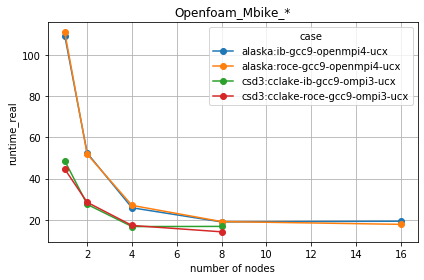

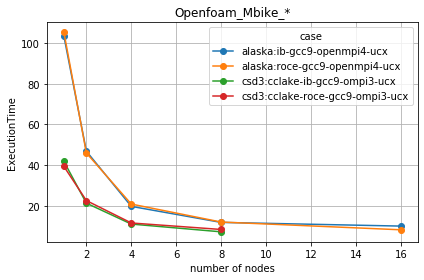

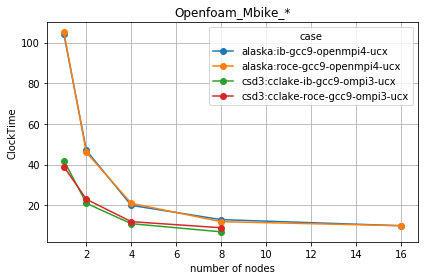

In [9]:
for perf_var in ['runtime_real', 'ExecutionTime', 'ClockTime']:
    df = modules.utils.tabulate_last_perf('Openfoam_Mbike_*', 'num_nodes', perf_var)
    display(Markdown('### %s' % perf_var))
    display(df)
    ax = df.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel(perf_var)
    ax.set_title('Openfoam_Mbike_*')
    plt.tight_layout()